In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import chardet
with open('/content/final.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [4]:
tracks = pd.read_csv('/content/final.csv', encoding=encoding)
tracks.head(10)

,rank,artist_names,artist_individual,artist_id,artist_genre,track_name,release_date,album_num_tracks,album_cover,peak_rank,...,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,1,Paulo Londra,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,Plan A,3/23/2022,1,https://i.scdn.co/image/ab67616d0000b2737e1179...,1,...,0,1,-4.875,0.0444,0.0495,0,0.0658,0.557,173.935,178203
1,2,WOS,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,ARRANCARMELO,4/6/2022,1,https://i.scdn.co/image/ab67616d0000b273d8c994...,2,...,5,1,-7.358,0.0738,0.724,0,0.134,0.262,81.956,183547
2,3,Paulo Londra,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,Chance,4/6/2022,2,https://i.scdn.co/image/ab67616d0000b273274a28...,3,...,1,0,-9.483,0.0646,0.241,0,0.0929,0.216,137.915,204003
3,5,Cris Mj,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,Una Noche en Medellín,1/21/2022,1,https://i.scdn.co/image/ab67616d0000b273697ed1...,5,...,10,0,-5.253,0.077,0.0924,4.60E-05,0.0534,0.832,96.018,153750
4,6,Emilia,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,cuatro veinte,3/24/2022,1,https://i.scdn.co/image/ab67616d0000b273116b57...,6,...,7,0,-3.817,0.0505,0.0811,6.25E-05,0.101,0.501,95.066,133895
5,11,Harry Styles,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,As It Was,3/31/2022,1,https://i.scdn.co/image/ab67616d0000b273b46f74...,6,...,6,0,-5.338,0.0557,0.342,0.00101,0.311,0.662,173.93,167303
6,17,La K'onga,La K'onga,spotify:artist:3ghRXw2nUEH2THaL82hw8R,cuarteto,Te Mentiría,12/9/2021,14,https://i.scdn.co/image/ab67616d0000b273fa1757...,14,...,7,1,-6.889,0.0549,0.116,0,0.0708,0.653,153.104,218431
7,20,Maria Becerra,Maria Becerra,spotify:artist:1DxLCyH42yaHKGK3cl5bvG,pop argentino,Felices x Siempre,2/22/2022,1,https://i.scdn.co/image/ab67616d0000b2734d647b...,11,...,5,0,-6.653,0.123,0.375,0.00974,0.112,0.256,100.089,199657
8,23,Anitta,Anitta,spotify:artist:7FNnA9vBm6EKceENgCGRMb,funk pop,Envolver,4/12/2022,15,https://i.scdn.co/image/ab67616d0000b27396e264...,13,...,4,0,-5.421,0.0833,0.152,0.00254,0.0914,0.396,91.993,193806
9,24,LIT killah,LIT killah,spotify:artist:1vqR17Iv8VFdzure1TAXEq,argentine hip hop,La Trampa es Ley,2/10/2022,1,https://i.scdn.co/image/ab67616d0000b2735ef615...,2,...,6,1,-5.815,0.136,0.243,0,0.204,0.632,117.871,141864


**Data Cleaning**

In [5]:
tracks.shape


(44634, 23)

In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44634 entries, 0 to 44633
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               44634 non-null  object
 1   artist_names       44634 non-null  object
 2   artist_individual  44634 non-null  object
 3   artist_id          44634 non-null  object
 4   artist_genre       44634 non-null  object
 5   track_name         44634 non-null  object
 6   release_date       44634 non-null  object
 7   album_num_tracks   44634 non-null  object
 8   album_cover        44634 non-null  object
 9   peak_rank          44634 non-null  object
 10  previous_rank      44634 non-null  object
 11  danceability       44544 non-null  object
 12  energy             44544 non-null  object
 13  key                44544 non-null  object
 14  mode               44544 non-null  object
 15  loudness           44544 non-null  object
 16  speechiness        44543 non-null  objec

In [7]:
tracks.isnull().sum()

rank                  0
artist_names          0
artist_individual     0
artist_id             0
artist_genre          0
track_name            0
release_date          0
album_num_tracks      0
album_cover           0
peak_rank             0
previous_rank         0
danceability         90
energy               90
key                  90
mode                 90
loudness             90
speechiness          91
acousticness         91
instrumentalness     91
liveness             91
valence              91
tempo                91
duration             91
dtype: int64

In [8]:
tracks.dropna(inplace = True)
tracks.shape

(44543, 23)

In [9]:
tracks.columns

Index(['rank', 'artist_names', 'artist_individual', 'artist_id',
       'artist_genre', 'track_name', 'release_date', 'album_num_tracks',
       'album_cover', 'peak_rank', 'previous_rank', 'danceability', 'energy',
       'key', 'mode', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration'],
      dtype='object')

In [10]:
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

In [11]:
tracks=tracks[tracks['rank']!='rank']
tracks.shape

(1867, 23)

In [12]:
tracks['rank']=pd.to_numeric(tracks['rank'])

In [13]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 44575
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               1867 non-null   int64 
 1   artist_names       1867 non-null   object
 2   artist_individual  1867 non-null   object
 3   artist_id          1867 non-null   object
 4   artist_genre       1867 non-null   object
 5   track_name         1867 non-null   object
 6   release_date       1867 non-null   object
 7   album_num_tracks   1867 non-null   object
 8   album_cover        1867 non-null   object
 9   peak_rank          1867 non-null   object
 10  previous_rank      1867 non-null   object
 11  danceability       1867 non-null   object
 12  energy             1867 non-null   object
 13  key                1867 non-null   object
 14  mode               1867 non-null   object
 15  loudness           1867 non-null   object
 16  speechiness        1867 non-null   object

In [14]:
tracks = tracks.sort_values(by=['rank'], ascending=False).head(10000)
tracks.shape

(1867, 23)

In [15]:
tracks['previous_rank']=pd.to_numeric(tracks['previous_rank'])
tracks['danceability']=pd.to_numeric(tracks['danceability'])
tracks['energy']=pd.to_numeric(tracks['energy'])
tracks['key']=pd.to_numeric(tracks['key'])
tracks['mode']=pd.to_numeric(tracks['mode'])
tracks['loudness']=pd.to_numeric(tracks['loudness'])
tracks['speechiness']=pd.to_numeric(tracks['speechiness'])
tracks['acousticness']=pd.to_numeric(tracks['acousticness'])
tracks['instrumentalness']=pd.to_numeric(tracks['instrumentalness'])
tracks['liveness']=pd.to_numeric(tracks['liveness'])
tracks['valence']=pd.to_numeric(tracks['valence'])
tracks['tempo']=pd.to_numeric(tracks['tempo'])
tracks['duration']=pd.to_numeric(tracks['duration'])
tracks['release_date']=pd.to_datetime(tracks['release_date'])
tracks['release_date']=pd.to_datetime(tracks['release_date'])
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 3963 to 0
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rank               1867 non-null   int64         
 1   artist_names       1867 non-null   object        
 2   artist_individual  1867 non-null   object        
 3   artist_id          1867 non-null   object        
 4   artist_genre       1867 non-null   object        
 5   track_name         1867 non-null   object        
 6   release_date       1867 non-null   datetime64[ns]
 7   album_num_tracks   1867 non-null   object        
 8   album_cover        1867 non-null   object        
 9   peak_rank          1867 non-null   object        
 10  previous_rank      1867 non-null   int64         
 11  danceability       1867 non-null   float64       
 12  energy             1867 non-null   float64       
 13  key                1867 non-null   int64         
 14  mode    

In [16]:
tracks['release_year']=pd.DatetimeIndex(tracks['release_date']).year
tracks['release_year'].head(3)

3963     2018
40662    2020
33616    2015
Name: release_year, dtype: int64

In [17]:
a = tracks.select_dtypes(include='number')
a.head(2)


,rank,previous_rank,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,release_year
3963,200,-1,0.808,0.717,9,1,-5.182,0.0616,0.0392,0.0,0.363,0.395,140.018,139128.0,2018
40662,200,103,0.721,0.632,5,0,-6.695,0.0358,0.0693,0.0,0.291,0.296,92.057,144860.0,2020


**Exploratory Data Analysis**

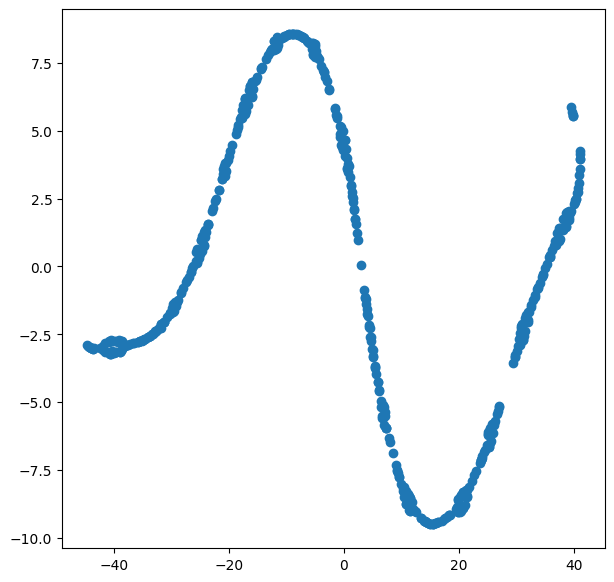

In [18]:
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(a.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

In [19]:
tracks['release_year'].value_counts()

2021    785
2022    362
2020    251
2019     83
2018     44
       ... 
1979      1
1975      1
1967      1
1989      1
1962      1
Name: release_year, Length: 62, dtype: int64

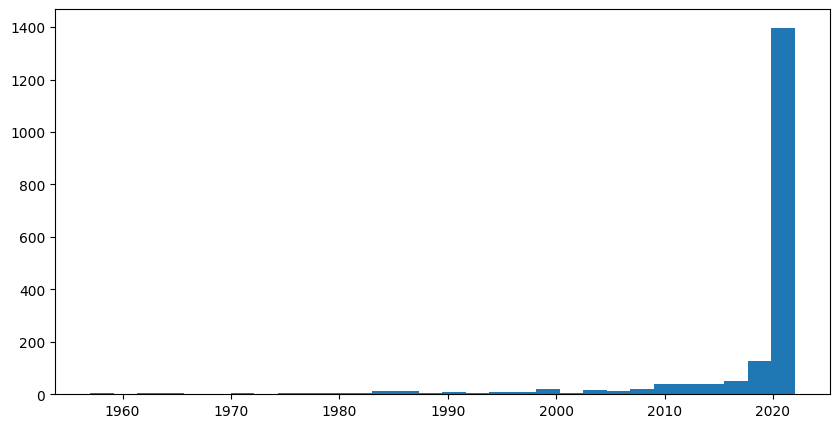

In [20]:

plt.figure(figsize = (10, 5))
plt.hist(tracks['release_year'],bins=30)
plt.axis('on')
plt.show()

In [21]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)

len(floats)

10

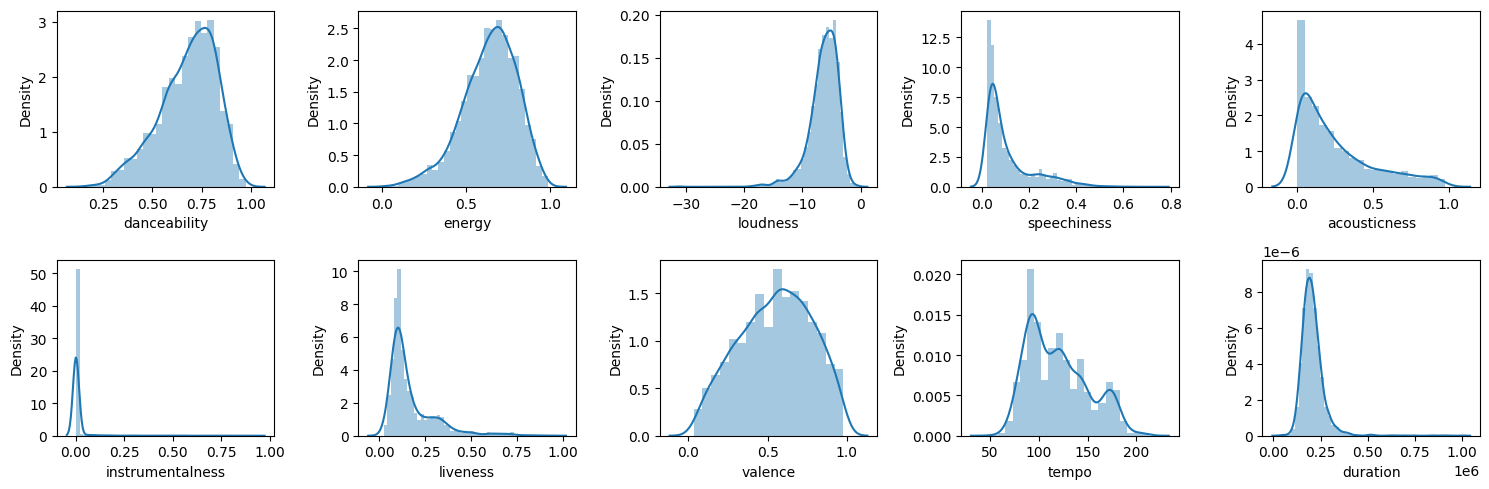

In [22]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
  if i == 9:
    break
plt.tight_layout()
plt.show()

In [23]:
tracks.to_csv('cleaned_tracks.csv')

In [24]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['artist_genre'])


In [25]:
def get_similarities(song_name, data):

  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['artist_genre']).toarray()
  num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()

  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['track_name']

    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['track_name']==name]['artist_genre']).toarray()
    num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()

    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)

  return sim


In [26]:

def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['track_name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'rank'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artist_names']][2:7])

In [27]:
recommend_songs('As It Was')

,track_name,artist_names
4343,"1 step forward, 3 steps back",Olivia Rodrigo
7110,Te Felicito,"Shakira, Rauw Alejandro"
29512,you broke me first,Tate McRae
288,Butter,BTS
1012,MONEY,LISA


In [28]:
recommend_songs('Te Felicito')

,track_name,artist_names
29671,Lost,Maroon 5
30476,On The Ground,ROSÉ
38775,Just a Cloud Away,Pharrell Williams
5,As It Was,Harry Styles
34233,LOST IN THE CITADEL,Lil Nas X


In [30]:
import pickle

In [31]:
# Load the data into the 'df' variable
df = ... # Load data using appropriate method

In [32]:
# Calculate similarity and store it in the 'similarity' variable
similarity = ... # Calculate similarity using appropriate method

In [33]:
with open('df.pkl','wb') as f:
  pickle.dump(df,f)
with open('similarity.pkl','wb') as f:
  pickle.dump(similarity,f)